/tmp/ipykernel_1028084/1103190438.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1028084/1103190438.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



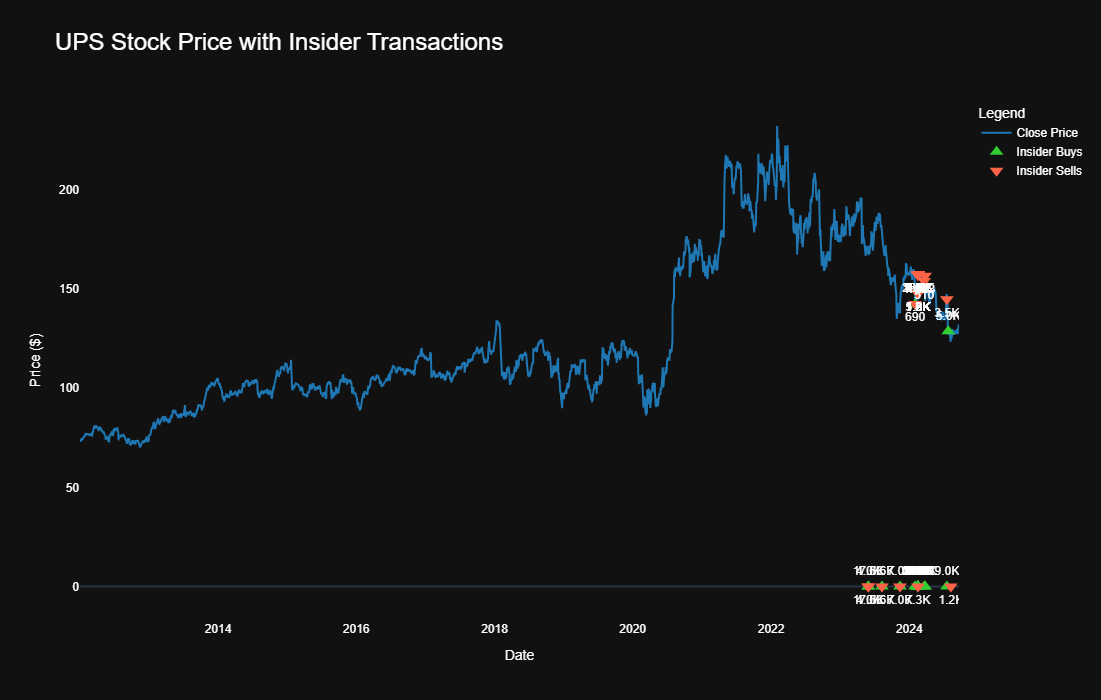

In [5]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load market data
market_data_file = 'data/UPS_EOD_2012-01-01_to_2024-09-21.csv'
market_df = pd.read_csv(market_data_file)
market_df['date'] = pd.to_datetime(market_df['date'])

# Load insider trading data
insider_data_file = 'insider_trading/ups-0001090727-insider-trading.csv'
insider_df = pd.read_csv(insider_data_file)
insider_df['transaction_date'] = pd.to_datetime(insider_df['transaction_date'])

# Filter buys and sells
insider_buys = insider_df[insider_df['transaction_acquired_disposed_code'] == 'A']
insider_sells = insider_df[insider_df['transaction_acquired_disposed_code'] == 'D']

# Format transaction amounts
def format_amount(x):
    x = float(x)
    if x >= 1e6:
        return f'{x/1e6:.1f}M'
    elif x >= 1e3:
        return f'{x/1e3:.1f}K'
    else:
        return f'{x:.0f}'

insider_buys['formatted_amount'] = insider_buys['transaction_amount'].apply(format_amount)
insider_sells['formatted_amount'] = insider_sells['transaction_amount'].apply(format_amount)

# Create figure
fig = make_subplots(specs=[[{"secondary_y": False}]])

# Plot stock price
fig.add_trace(
    go.Scatter(
        x=market_df['date'],
        y=market_df['close'],
        mode='lines',
        name='Close Price',
        line=dict(color='#1f77b4')
    )
)

# Plot insider buys
fig.add_trace(
    go.Scatter(
        x=insider_buys['transaction_date'],
        y=insider_buys['transaction_price'].astype(float),
        mode='markers+text',
        name='Insider Buys',
        marker=dict(color='limegreen', symbol='triangle-up', size=12),
        text=insider_buys['formatted_amount'],
        textposition='top center',
        hovertemplate='<b>Insider Buy</b><br>Date: %{x|%Y-%m-%d}<br>Price: $%{y:.2f}<br>Amount: %{text}<br>Owner: %{customdata}',
        customdata=insider_buys['owner_name']
    )
)

# Plot insider sells
fig.add_trace(
    go.Scatter(
        x=insider_sells['transaction_date'],
        y=insider_sells['transaction_price'].astype(float),
        mode='markers+text',
        name='Insider Sells',
        marker=dict(color='tomato', symbol='triangle-down', size=12),
        text=insider_sells['formatted_amount'],
        textposition='bottom center',
        hovertemplate='<b>Insider Sell</b><br>Date: %{x|%Y-%m-%d}<br>Price: $%{y:.2f}<br>Amount: %{text}<br>Owner: %{customdata}',
        customdata=insider_sells['owner_name']
    )
)

# Update layout
fig.update_layout(
    title='UPS Stock Price with Insider Transactions',
    xaxis_title='Date',
    yaxis_title='Price ($)',
    legend_title='Legend',
    hovermode='x unified',
    template='plotly_dark',
    width=1200,
    height=700,
    font=dict(
        family='Helvetica, Arial, sans-serif',
        size=12,
        color='white'
    ),
    title_font=dict(
        size=24,
        color='white'
    )
)

# Customize axes
fig.update_xaxes(
    range=[market_df['date'].min(), market_df['date'].max()],
    showgrid=False
)
fig.update_yaxes(showgrid=False)

# Show figure
fig.show()
